In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten

In [2]:
data = pd.read_csv('E:/BTC-USD.csv')
df = data
X = []
Y = []
window_size=100
for i in range(1, len(df) - window_size - 1, 1):
    first = df.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 4] - first) / first)
    temp2.append((df.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)

train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [4]:
model = tf.keras.Sequential()

# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [5]:
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=128, verbose=1, shuffle =True)
history_dict = history.history 
train_loss = history_dict['loss']
train_msle = history_dict['mse'] 

model.evaluate(test_X,test_Y)

Epoch 1/100
7/7 [==============================] - 2s 90ms/step - loss: 0.3846 - mse: 0.3846 - mae: 0.4005 - val_loss: 0.1813 - val_mse: 0.1813 - val_mae: 0.2985
Epoch 2/100
7/7 [==============================] - 0s 45ms/step - loss: 0.1296 - mse: 0.1296 - mae: 0.2655 - val_loss: 0.0881 - val_mse: 0.0881 - val_mae: 0.2362
Epoch 3/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0990 - mse: 0.0990 - mae: 0.2279 - val_loss: 0.0646 - val_mse: 0.0646 - val_mae: 0.1776
Epoch 4/100
7/7 [==============================] - 0s 49ms/step - loss: 0.0747 - mse: 0.0747 - mae: 0.1990 - val_loss: 0.0542 - val_mse: 0.0542 - val_mae: 0.1798
Epoch 5/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0626 - mse: 0.0626 - mae: 0.1719 - val_loss: 0.0479 - val_mse: 0.0479 - val_mae: 0.1594
Epoch 6/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0548 - mse: 0.0548 - mae: 0.1642 - val_loss: 0.0449 - val_mse: 0.0449 - val_mae: 0.1535
Epoch 7/100
7/7 [===========

7/7 [==============================] - 0s 33ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0845 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0984
Epoch 52/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0170 - mse: 0.0170 - mae: 0.0882 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.0983
Epoch 53/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0848 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.0981
Epoch 54/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0842 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.0940
Epoch 55/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0150 - mse: 0.0150 - mae: 0.0815 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.0950
Epoch 56/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0811 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.0942
Epoch 57/100
7/7 [=================

7/7 [==============================] - 0s 4ms/step - loss: 0.0167 - mse: 0.0167 - mae: 0.0882


[0.016722863540053368, 0.016722863540053368, 0.08817705512046814]

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# Calculate MAE, RMSE, and R^2
mae = mean_absolute_error(test_Y.reshape(-1, 1), yhat_probs)
print('Mean Absolute Error (MAE): %f' % mae)

rmse = np.sqrt(mean_squared_error(test_Y.reshape(-1, 1), yhat_probs))
print('Root Mean Squared Error (RMSE): %f' % rmse)

r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
print('R2 Score: %f' % r2)

Mean Absolute Error (MAE): 0.088177
Root Mean Squared Error (RMSE): 0.129317
R2 Score: 0.969415


In [7]:
# Predict the values using the trained model
predictions = model.predict(test_X)

# Reverse the normalization process
def denormalize(value, first_value):
    return value * first_value + first_value

denormalized_predictions = np.empty_like(predictions)
denormalized_test_Y = np.empty_like(test_Y)

# Apply denormalization
for i in range(len(predictions)):
    first_value = df.iloc[i + window_size, 5]
    denormalized_predictions[i] = denormalize(predictions[i], first_value)
    denormalized_test_Y[i] = denormalize(test_Y[i], first_value)
    
# Compare denormalized predictions with actual values
for i in range(len(denormalized_predictions)):
    print(f"Prediction: {denormalized_predictions[i][0].item():.2f} | Actual: {denormalized_test_Y[i][0].item():.2f}")

4/4 [==============================] - 0s 5ms/step
Prediction: 6399.98 | Actual: 6216.39
Prediction: 8722.94 | Actual: 9022.39
Prediction: 13315.81 | Actual: 13351.63
Prediction: 4254.63 | Actual: 3955.88
Prediction: 6114.56 | Actual: 6246.75
Prediction: 4817.77 | Actual: 5461.51
Prediction: 5641.42 | Actual: 4781.01
Prediction: 6198.66 | Actual: 6512.47
Prediction: 8383.69 | Actual: 8241.37
Prediction: 7043.32 | Actual: 7436.44
Prediction: 5392.09 | Actual: 4885.86
Prediction: 3790.54 | Actual: 4403.39
Prediction: 5397.62 | Actual: 5235.27
Prediction: 11717.45 | Actual: 11992.22
Prediction: 14542.90 | Actual: 13207.81
Prediction: 11157.26 | Actual: 11667.78
Prediction: 5231.36 | Actual: 5212.08
Prediction: 9636.28 | Actual: 9162.26
Prediction: 7759.20 | Actual: 8768.54
Prediction: 24467.43 | Actual: 24962.08
Prediction: 5316.85 | Actual: 5977.35
Prediction: 26664.21 | Actual: 23072.96
Prediction: 7462.06 | Actual: 7140.54
Prediction: 19156.55 | Actual: 16704.44
Prediction: 21317.46 | 

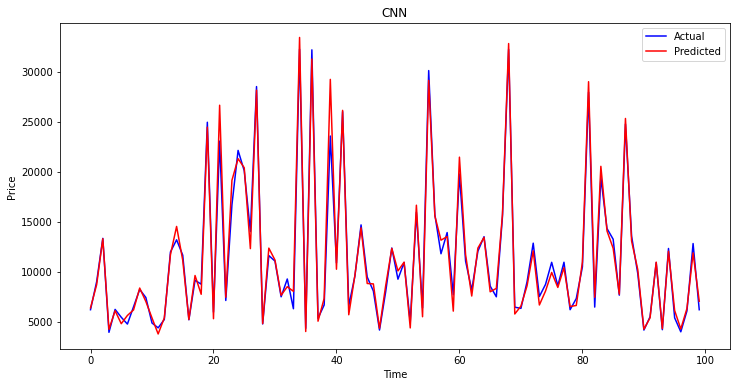

<Figure size 432x288 with 0 Axes>

In [12]:
# Flatten the denormalized_test_Y and denormalized_predictions arrays
denormalized_test_Y_flattened = denormalized_test_Y.flatten()
denormalized_predictions_flattened = denormalized_predictions.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(denormalized_test_Y_flattened, label='Actual', color='blue')
plt.plot(denormalized_predictions_flattened, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('CNN')
plt.show()
# Save the plot as an image file
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')

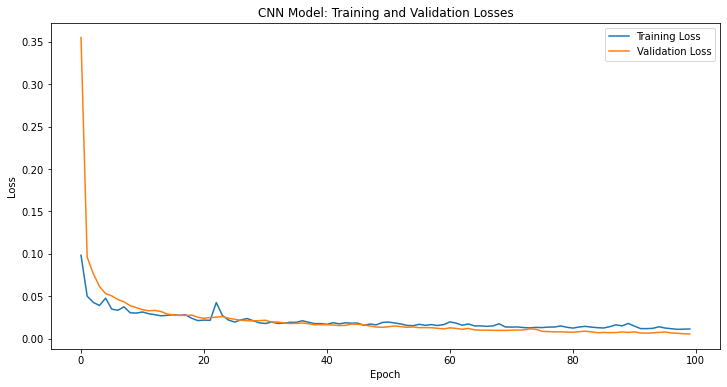

In [11]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('CNN Model: Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()